In [2]:
# Ajusta el mismo modelo que en el ejercicio 8.2. pero empleando Gradient Boosting. Obtén la importancia de las variables ajustadas tanto para el
# modelo de Random Forest empleado en el ejercicio anterior, como para el obtenido en el modelo de Gradient Boosting.

In [5]:
# Se comienza cargando el dataset
import pandas as pd
from sklearn.datasets import load_wine # Para importar el conjunto de datos

wine = load_wine(as_frame=True) # Se importa el conjunto de datos como un dataframe (as_frame=True)

# Variables predictoras
print(wine.data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [8]:
# Se divide el dataset en un conjunto de entrenamiento y un conjunto de test. El conjunto de entrenamiento está formado por 128 datos de los 178
# totales. El tanto por uno para el conjunto de test es (178-128)/178.
import numpy as np
# Función para crear el conjunto de entrenamiento y el conjunto de validación
# 'dataset' es el dataframe y 'porcentaje_validacion' es la proporción en tanto por un 1 para el conjunto de validación.
def particiones(target, dataset, porcentaje_validacion):
    
    # 'int' se queda con la parte entera. Con len(dataset) se calcula la longitud de cada columna
    tamaño_validacion = int(round(len(dataset)*porcentaje_validacion,0))

    # Crea un array con los índices de 'dataset' dispuestos de forma aleatoria
    mezclar_indices = np.random.permutation(len(dataset))

    # Se queda con tantos índices del array anterior como datos debe haber en el conjunto de validación
    indices_validacion = mezclar_indices[:tamaño_validacion]

    # Los índices restantes son para los datos del dataset de entrenamiento
    indices_entrenamiento = mezclar_indices[tamaño_validacion:]

    # Se devuelven los dataset de entrenamiento y de test. 'iloc' saca filas
    return dataset.iloc[indices_entrenamiento], dataset.iloc[indices_validacion], target.iloc[indices_entrenamiento], target.iloc[indices_validacion]

# Se llama a la función para crear el conjunto de entrenamiento (train) y el conjunto de validación (test). 
X_train, X_test, y_train, y_test = particiones(wine.target, wine.data, (178-128)/178)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier # Para implementar Gradient Boosting
from sklearn.metrics import accuracy_score # Para medir bondad del ajuste

# Se crea objeto de la clase GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=500, random_state=3)

# Se ajusta el modelo
gb_clf.fit(X_train, y_train)

# Estimaciones del modelo sobre el conjunto de validación
y_pred_gb = gb_clf.predict(X_test)

# Bondad del ajuste
print(accuracy_score(y_test, y_pred_gb))

1.0


In [14]:
# Se obtiene un mayor valor de accuracy que con los modelos desarrollados en el ejercicio 8.2.

In [16]:
# A continuación ajustamos los parámetros del ensamble para obtener mejores predicciones. En concreto, se prueban diferentes valores para los
# hiperparámetros learning_rate y max_depth.

learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
max_depths = [1, 2, 3, 4]

# Inicialización del vector de resultados
resultados_test = []

for eta in learning_rates:
    for d in max_depths:
        gb_clf_i = GradientBoostingClassifier(learning_rate=eta, n_estimators=500, max_depth=d, random_state=3)
        gb_clf_i.fit(X_train, y_train)
        y_pred_test = gb_clf_i.predict(X_test)
        acc_test = accuracy_score(y_test, y_pred_test)
        resultados_test.append(acc_test)

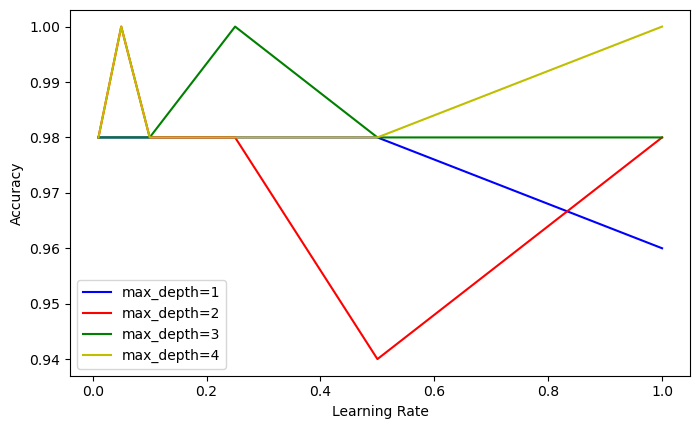

In [22]:
# Se representan gráficamente los resultados para accuracy de cada modelo
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4.75))

line1 = plt.plot(learning_rates, resultados_test[0:6], 'b', label='max_depth=1')
line2 = plt.plot(learning_rates, resultados_test[6:12], 'r', label='max_depth=2')
line3 = plt.plot(learning_rates, resultados_test[12:18], 'g', label='max_depth=3')
line4 = plt.plot(learning_rates, resultados_test[18:24], 'y', label='max_depth=4')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.show()

In [24]:
# Los mejores resultados de acuerdo con el valor de accuracy son:
# - max_depth=4, learning_rate=0.05
# - max_depth=3, learning_rate=0.25
# - max_depth=4, learning_rate=1

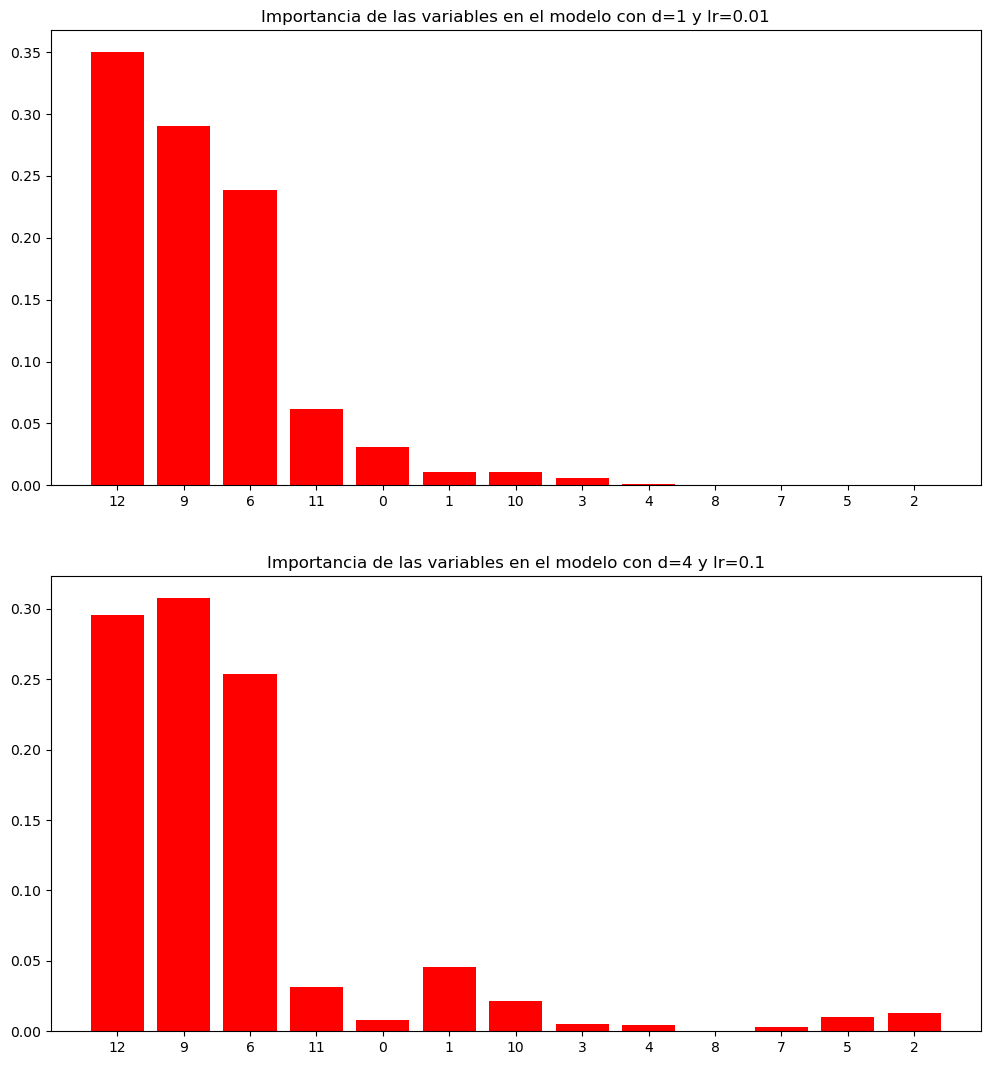

In [46]:
# Evaluamos la importancia de las variables de algunos modelos anteriores

gb_clf_i1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=500, random_state=3, max_depth=1)
gb_clf_i1.fit(X_train, y_train)
importancias1 = gb_clf_i1.feature_importances_
indices1 = np.argsort(importancias1)[::-1]

gb_clf_i2 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=500, random_state=3, max_depth=4)
gb_clf_i2.fit(X_train, y_train)
importancias2 = gb_clf_i2.feature_importances_
indices2 = np.argsort(importancias1)[::-1] # [::-1] para obtener la lista al revés

plt.figure(figsize=(12, 13))

plt.subplot(211)
plt.title('Importancia de las variables en el modelo con d=1 y lr=0.01')
plt.bar(range(X_train.shape[1]), importancias1[indices1], color='r', align='center')
plt.xticks(range(X_train.shape[1]), indices1)
plt.xlim([-1, X_train.shape[1]])

plt.subplot(212)
plt.title('Importancia de las variables en el modelo con d=4 y lr=0.1')
plt.bar(range(X_train.shape[1]), importancias2[indices2], color='r', align='center')
plt.xticks(range(X_train.shape[1]), indices2)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [40]:
gb_clf_i1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=500, random_state=3, max_depth=1)
gb_clf_i1.fit(X_train, y_train)
importancias1 = gb_clf_i1.feature_importances_
np.argsort(importancias1)[::-1]

array([12,  9,  6, 11,  0,  1, 10,  3,  4,  8,  7,  5,  2], dtype=int64)

In [48]:
# Las tres variables más importantes son las mismas en ambos modelos, pero en el modelo con profundidad d=4 crece la importancia de otras variables.
# Ello puede deberse a que estas variables no son importantes de forma directa sino indirectamente a través de interacciones con otras variables. La
# codificación de las variables se obtiene con el método info:
print(wine.data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl